<a href="https://colab.research.google.com/github/jsooyoun/Basic-ML-Practice/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

x = np.arange(0, 1, 0.1)
print(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [ ]:
import numpy as np
np.random.seed(100)
eps = np.random.normal(0, 0.4, 10)

In [ ]:
#The function of interest is y = sin(2πx) + ε. Use that formula to set y. Use np.sin and np.pi, and of course ε is eps
y = np.sin(2 * np.pi * x) + eps

In [ ]:
#Create a linspace u that goes from 0 to 1, with 100 sample points.
u = np.linspace(0, 1, 100)

#Set v using the formula v = sin(2πu), without noise.
v = np.sin(2 * np.pi * u)

#Show the shape of v
print(v.shape)

(100,)


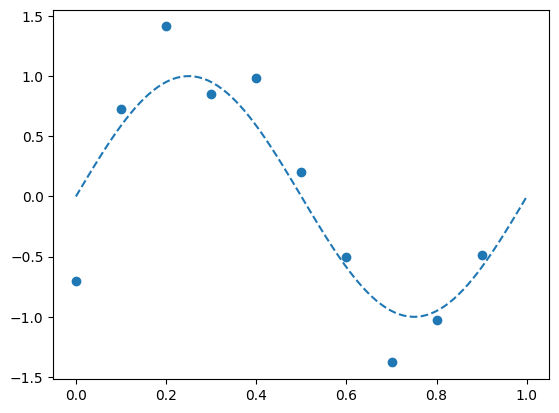

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(u, v, linestyle='--')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

x_temp = x.reshape(-1, 1)
X = poly.fit_transform(x_temp)
print(X)

[[1.   0.   0.  ]
 [1.   0.1  0.01]
 [1.   0.2  0.04]
 [1.   0.3  0.09]
 [1.   0.4  0.16]
 [1.   0.5  0.25]
 [1.   0.6  0.36]
 [1.   0.7  0.49]
 [1.   0.8  0.64]
 [1.   0.9  0.81]]


In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X, y)
y_hat = clf.predict(X)
print(y_hat)

[ 0.18645554  0.42053924  0.55198924  0.58080555  0.50698817  0.33053709
  0.05145231 -0.33026615 -0.81461832 -1.40160417]


In [ ]:
u_temp = u.reshape(-1, 1)
U = poly.transform(u_temp)
v_hat = clf.predict(U)
print(v_hat.shape)

(100,)


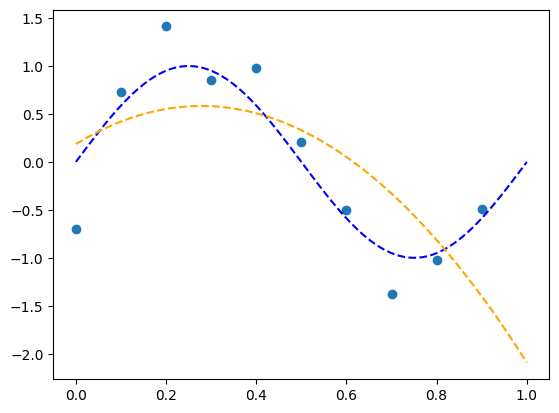

In [ ]:
plt.scatter(x, y)
plt.plot(u, v, 'blue', linestyle='--')
plt.plot(u, v_hat, 'orange', linestyle='--')

In [ ]:
squared_error = np.sum((y_hat - y) ** 2)
squared_error

4.217575429453557

In [ ]:
from sklearn.metrics import mean_squared_error as mse

train_err = mse(y, y_hat)
test_err = mse(v, v_hat)
print(train_err)
print(test_err)

0.4217575429453557
0.38194316875300666


In [ ]:
from collections import namedtuple
Prediction = namedtuple('Prediction',['clf', 'train_err', 'test_err', 'v_hat'])

In [ ]:
import numpy as np

x = np.arange(0, 1, 0.1)

def make_prediction(d):
  poly = PolynomialFeatures(degree=d)

  clf = LinearRegression()
  x_temp = x.reshape(-1, 1)
  X = poly.fit_transform(x_temp)

  clf = LinearRegression()
  clf.fit(X, y)
  y_hat = clf.predict(X)

  u_temp = u.reshape(-1, 1)
  U = poly.transform(u_temp)
  v_hat = clf.predict(U)

  train_err = mse(y, y_hat)
  test_err = mse(v, v_hat)

  return Prediction(clf=clf, train_err=train_err, test_err=test_err, v_hat=v_hat)

In [ ]:
make_prediction(2)

Prediction(clf=LinearRegression(), train_err=0.4217575429453557, test_err=0.38194316875300666, v_hat=array([ 0.18645554,  0.21476029,  0.24201787,  0.26822827,  0.29339149,
        0.31750754,  0.34057641,  0.3625981 ,  0.38357262,  0.40349997,
        0.42238014,  0.44021313,  0.45699894,  0.47273759,  0.48742905,
        0.50107334,  0.51367045,  0.52522039,  0.53572315,  0.54517874,
        0.55358715,  0.56094839,  0.56726245,  0.57252933,  0.57674904,
        0.57992157,  0.58204693,  0.58312511,  0.58315611,  0.58213994,
        0.58007659,  0.57696607,  0.57280837,  0.5676035 ,  0.56135145,
        0.55405223,  0.54570583,  0.53631225,  0.5258715 ,  0.51438357,
        0.50184846,  0.48826618,  0.47363673,  0.4579601 ,  0.44123629,
        0.42346531,  0.40464715,  0.38478182,  0.36386931,  0.34190962,
        0.31890276,  0.29484872,  0.26974751,  0.24359912,  0.21640356,
        0.18816082,  0.1588709 ,  0.12853381,  0.09714954,  0.0647181 ,
        0.03123948, -0.00328631, -0

In [ ]:
print(make_prediction(2).train_err)
print(train_err)

0.4217575429453557
0.4217575429453557


In [ ]:
print(make_prediction(2))
print(make_prediction(3))

Prediction(clf=LinearRegression(), train_err=0.4217575429453557, test_err=0.38194316875300666, v_hat=array([ 0.18645554,  0.21476029,  0.24201787,  0.26822827,  0.29339149,
        0.31750754,  0.34057641,  0.3625981 ,  0.38357262,  0.40349997,
        0.42238014,  0.44021313,  0.45699894,  0.47273759,  0.48742905,
        0.50107334,  0.51367045,  0.52522039,  0.53572315,  0.54517874,
        0.55358715,  0.56094839,  0.56726245,  0.57252933,  0.57674904,
        0.57992157,  0.58204693,  0.58312511,  0.58315611,  0.58213994,
        0.58007659,  0.57696607,  0.57280837,  0.5676035 ,  0.56135145,
        0.55405223,  0.54570583,  0.53631225,  0.5258715 ,  0.51438357,
        0.50184846,  0.48826618,  0.47363673,  0.4579601 ,  0.44123629,
        0.42346531,  0.40464715,  0.38478182,  0.36386931,  0.34190962,
        0.31890276,  0.29484872,  0.26974751,  0.24359912,  0.21640356,
        0.18816082,  0.1588709 ,  0.12853381,  0.09714954,  0.0647181 ,
        0.03123948, -0.00328631, -0

In [ ]:
np.allclose(make_prediction(2).v_hat, make_prediction(3).v_hat)

False

In [ ]:
preds = [make_prediction(d) for d in range(10)]

In [ ]:
print(preds[0])
print(preds[1])

Prediction(clf=LinearRegression(), train_err=0.8176656684426806, test_err=0.4950676975332393, v_hat=array([0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785, 0.00822785, 0.00822785, 0.00822785,
       0.00822785, 0.00822785

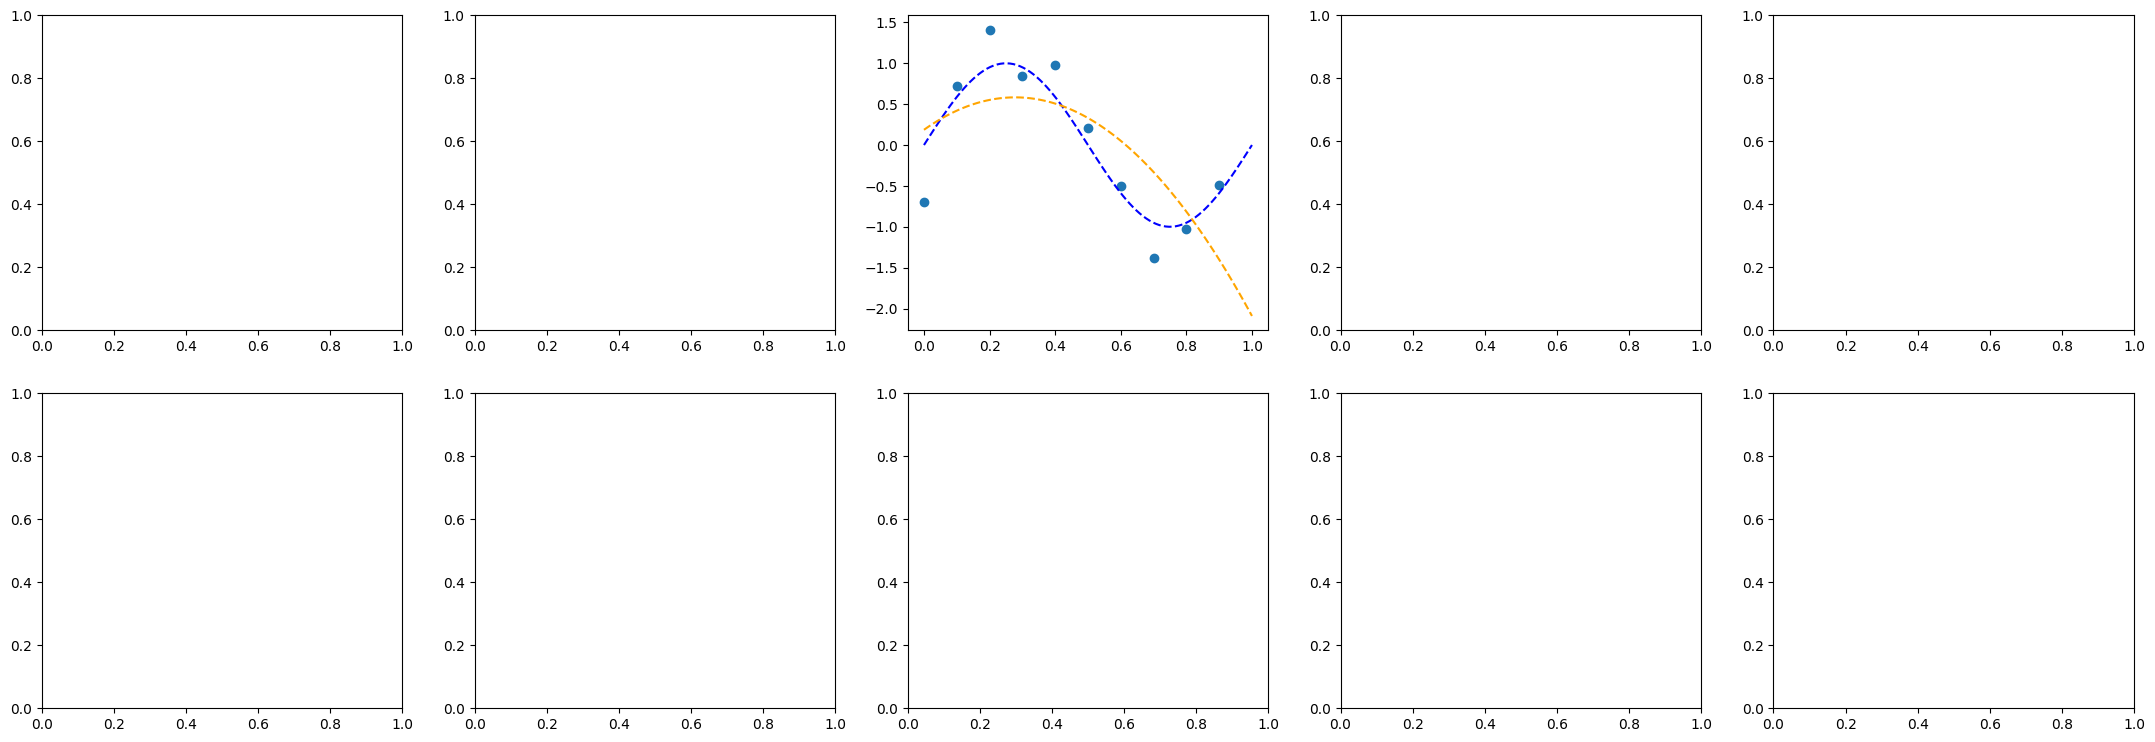

In [ ]:
(fig, axx) = plt.subplots(2, 5, figsize=(27,9))
ax = axx[0][2]
ax.scatter(x, y)
ax.plot(u, v, 'blue', linestyle='--')
ax.plot(u, v_hat, 'orange', linestyle='--')

In [ ]:
def plot_prediction(ax, pred):
  ax.set_ylim(-1.75, 1.75)
  ax.scatter(x, y)
  ax.plot(u, v, 'blue', linestyle='--')
  ax.plot(u, pred.v_hat, 'orange', linestyle='--')

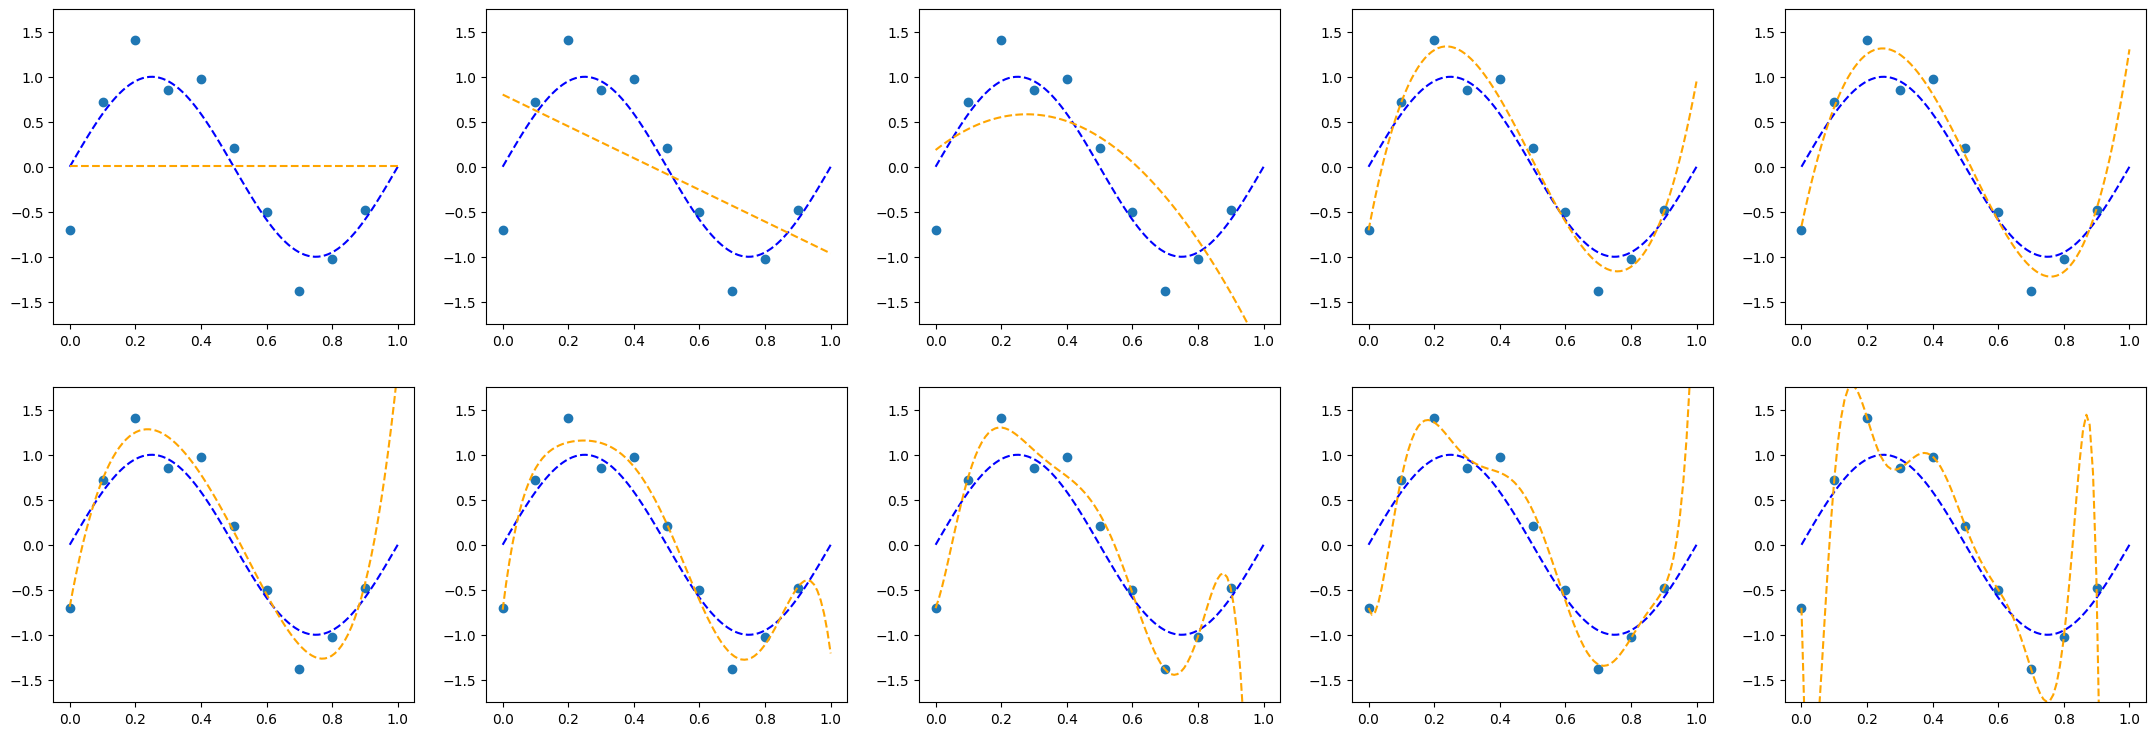

In [ ]:
(fig, axx) = plt.subplots(2, 5, figsize=(27,9))

for num in range(10):
    ax = axx[num//5][num%5]
    plot_prediction(ax, preds[num])

In [ ]:
train_errs = [pred.train_err for pred in preds]
test_errs = [pred.test_err for pred in preds]

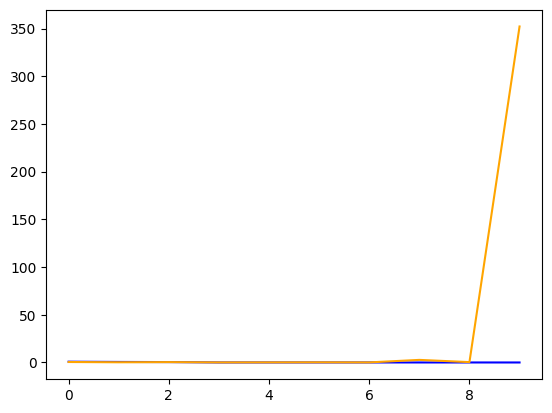

In [ ]:
plt.plot(train_errs,'blue',  label='train')
plt.plot(test_errs,'orange', label = "test")

(0.0, 2.0)

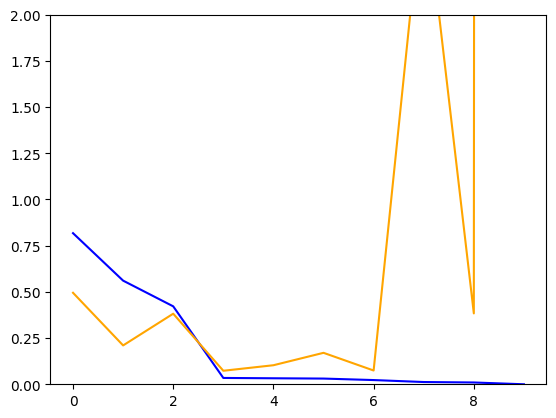

In [ ]:
plt.plot(train_errs, 'blue', label='train')
plt.plot(test_errs, 'orange',label='test')
plt.ylim(0., 2.)

This plot indicates that in comparison to the training error, which consistently decreases, the testing error is less consistent but is less than traing error up until a certain point, which in this case seems to be about 3 degrees. However after that point, the model begins to overfit the data.

In [ ]:
for d in range(10):
    coef = preds[d].clf.coef_
    norm = np.linalg.norm(coef)
    print(f"Degree {d}: Norm of the weight vector = {norm}")

Degree 0: Norm of the weight vector = 0.0
Degree 1: Norm of the weight vector = 1.7645107953084012
Degree 2: Norm of the weight vector = 5.871927696929591
Degree 3: Norm of the weight vector = 66.52861489510617
Degree 4: Norm of the weight vector = 49.884114119083684
Degree 5: Norm of the weight vector = 157.22098048280253
Degree 6: Norm of the weight vector = 2238.26509147609
Degree 7: Norm of the weight vector = 16636.47553781817
Degree 8: Norm of the weight vector = 97348.02405076848
Degree 9: Norm of the weight vector = 2158969.9146266314


In [ ]:
for d in range(1, 10):
    coef = preds[d].clf.coef_
    norm = np.linalg.norm(coef)
    log_norm = np.log(norm)
    print(f"Degree {d}: Log of the norm of the weight vector = {log_norm}")

Degree 1: Log of the norm of the weight vector = 0.5678734821696729
Degree 2: Log of the norm of the weight vector = 1.770182978043217
Degree 3: Log of the norm of the weight vector = 4.197632154284197
Degree 4: Log of the norm of the weight vector = 3.9097025977449964
Degree 5: Log of the norm of the weight vector = 5.057652334720688
Degree 6: Log of the norm of the weight vector = 7.713456332025251
Degree 7: Log of the norm of the weight vector = 9.719352885319505
Degree 8: Log of the norm of the weight vector = 11.48604771322166
Degree 9: Log of the norm of the weight vector = 14.58514177453493
